# UBER ASSIGNMENT

In [1]:
#Import python library and modules used in this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [2]:
#Read data file
uber=pd.read_csv("Uber Request Data.csv")
uber.head()

Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47

In [3]:
#check data type
print(uber.info())
#We can see that request and drop timestamp is not in proper date time format and many rows date time is in invalid format


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None


In [4]:
#Check shape of data frame
print(uber.shape) #(6745, 6)

(6745, 6)


In [5]:
#check NA values in each columns
print(uber.isnull().sum())

#We can see Driver id and Drop timestamp  has lots of null values which we need to take care
#Where no car available in that place driver ID and Drop timestamp is NA
#Where request in cancelled Drop timestamp is NA

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [6]:
#We can see many time stamp format example is like 13-07-2016 21:57:28 , 11/7/2016  11:51:00 AM
#Clearly it indicates that first value is day of month as it is more than 12(Max month count) 
#We can see most of data is for 13,14,15 July of 2016 but few date is in other format where month is at first parameter and day is second parameter
#mostly we can see 11th and 12th July data is in different format
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'],dayfirst=True)
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'],dayfirst=True)

#Now all date is in July and similar format
uber.head(10)

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   
5        3879      Airport        1.0  Trip Completed 2016-07-13 21:57:28   
6        4270      Airport        1.0  Trip Completed 2016-07-14 06:15:32   
7        5510      Airport        1.0  Trip Completed 2016-07-15 05:11:52   
8        6248         City        1.0  Trip Completed 2016-07-15 17:57:27   
9         267         City        2.0  Trip Completed 2016-07-11 06:46:00   

       Drop timestamp  
0 2016-07-11 13:00:00  
1 2016-07-11 18:47:00  
2 2016-07-12 09:58:00  
3 2016-07-12 22:03:00  
4 2016-07-13 09:25:47  
5 2016-07-13 22:28:59  
6 2016-07-14 07:13:15  
7 2016-07-15 06:07:52  
8 2016-07-15 18:50:51  
9 2016-07-11 07:25:00

In [7]:
#verify new datatype
print(uber.info())
#date time is in datetime format now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB
None


In [8]:
#Derive new column from existing data
#Like day, weekday, time
#derive Day of week using date.dt.day

uber['Request Date']=uber['Request timestamp'].dt.day

#Derive day of week and month using 
uber['Request Day']=uber['Request timestamp'].apply(lambda x: x.strftime("%A"))
uber['Request month']=uber['Request timestamp'].apply(lambda x: x.strftime("%B"))


In [9]:
#Create a function  that will indicate timeframe of a day
def timeframe(x):
    if (x>=5 and x<8):
        return("Early Morning")
    elif(x>=8 and x<10):
        return("Mid Morning")
    elif(x>=10 and x<12):
        return("Late Morning")
    elif (x>=12 and x<14):
        return("Early Afternoon")
    elif(x>=14 and x<16):
        return("Mid Afternoon")
    elif(x>=16 and x<18):
        return("Late Afternoon")
    elif(x>=18 and x<20):
        return("Early Evening")
    elif(x>=20 and x<22):
        return("Late Evening")
    else:
        return ("Night")
    
    

In [10]:
#Derice requested hour of the day
#derive a new column having morning, afternoon etc 
uber["request hour"]=uber['Request timestamp'].dt.hour
uber['Request timeframe']=uber["request hour"].apply(lambda x:timeframe(x))

In [11]:
#verify dataset

uber.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  Request Date Request Day Request month  request hour  \
0 2016-07-11 13:00:00            11      Monday          July            11   
1 2016-07-11 18:47:00            11      Monday          July            17   
2 2016-07-12 09:58:00            12     Tuesday          July             9   
3 2016-07-12 22:03:00            12     Tuesday          July            21   
4 2016-07-13 09:25:47            13   Wednesday          July             8   

  Request timeframe  
0      Late Morning  
1    Late Afternoon  
2       Mid Morning  
3      Late Evening  
4       Mid Morning

In [12]:
#Verify columns
uber.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Request Date', 'Request Day',
       'Request month', 'request hour', 'Request timeframe'],
      dtype='object')

In [47]:
#check how many request ot cancelled / Completed / Car not available
trip_status=uber[['Request id','Status']].groupby('Status',as_index=None).count()
trip_status

#We can see count of status
#Cancelled 1264 , Cars not available - 2650 , Trip completed 2831

Status  Request id
0          Cancelled        1264
1  No Cars Available        2650
2     Trip Completed        2831

In [14]:
#find percentage of different status rate
cancelled_rate=round((len(uber.loc[uber['Status']=="Cancelled"])/len(uber.index))*100,2)
cars_na_rate=round(((len(uber.loc[uber['Status']=="No Cars Available"]))/len(uber.index))*100,2)
trip_completion_rate=round(((len(uber.loc[uber['Status']=="Trip Completed"]))/len(uber.index)*100),2)
print(cancelled_rate) #18.74%
print(cars_na_rate)   #39.29%
print(trip_completion_rate) #41.97%

18.74
39.29
41.97


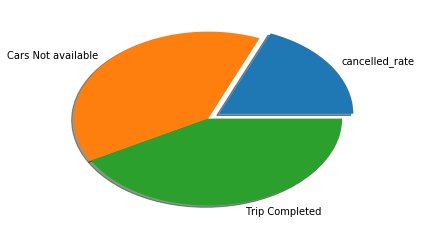

In [15]:
#represent rate in pie chart
labels=['cancelled_rate','Cars Not available','Trip Completed']
size=[18.74,39.29,41.97]

explode=(0.1,0,0)
plt.pie(size,explode=explode,labels=labels,shadow=True)
plt.show()

In [16]:
#Derive data relation between request timeframe and status
timeframe_status=uber[['Request timeframe','Status']].groupby(['Status','Request timeframe'])['Status'].count().reset_index(name="count")
timeframe_status

Status Request timeframe  count
0           Cancelled   Early Afternoon     37
1           Cancelled     Early Evening     48
2           Cancelled     Early Morning    490
3           Cancelled    Late Afternoon     57
4           Cancelled      Late Evening     83
5           Cancelled      Late Morning     77
6           Cancelled     Mid Afternoon     32
7           Cancelled       Mid Morning    353
8           Cancelled             Night     87
9   No Cars Available   Early Afternoon     97
10  No Cars Available     Early Evening    605
11  No Cars Available     Early Morning    233
12  No Cars Available    Late Afternoon    278
13  No Cars Available      Late Evening    555
14  No Cars Available      Late Morning    106
15  No Cars Available     Mid Afternoon     85
16  No Cars Available       Mid Morning    173
17  No Cars Available             Night    518
18     Trip Completed   Early Afternoon    210
19     Trip Completed     Early Evening    330
20     Trip Completed     Early Morning    526
21     Trip Completed    Late Afternoon    242
22     Trip Completed      Late Evening    303
23     Trip Completed      Late Morning    231
24     Trip Completed     Mid Afternoon    190
25     Trip Completed       Mid Morning    328
26     Trip Completed             Night    471

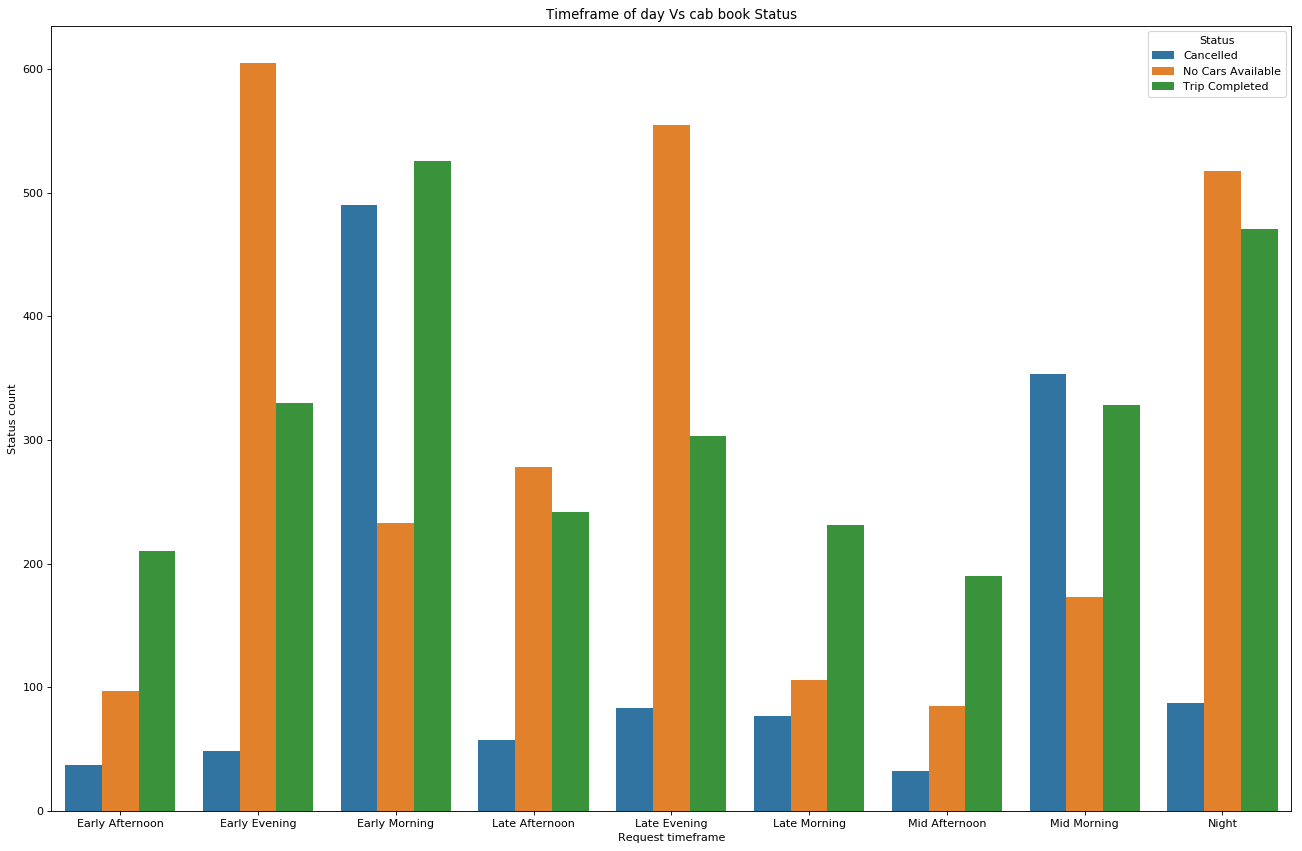

In [17]:
#Draw a plot having relation between request timeframe and status
plt.figure(figsize=(20,13),dpi=80)
plt.title("Timeframe of day Vs cab book Status")
sns.barplot(x='Request timeframe',y='count',hue='Status',data=timeframe_status,estimator=np.sum)
plt.ylabel("Status count")
plt.show()

From derived graph (Timeframe of day vs Cab status), we can see below noticable points
No Cars available mostly - Early Evening (605), Late Evening (555) and night(518)
Cancelled mostly - Early Morning (490) and Mid Morning (353)

We need to find out reason for this high amount of cancellation and cars not available

In [18]:
#Derive data of having relation between pickup point and status
pickup_status=uber[['Pickup point','Status']].groupby(['Pickup point','Status'])['Status'].count().reset_index(name="count")
pickup_status

Pickup point             Status  count
0      Airport          Cancelled    198
1      Airport  No Cars Available   1713
2      Airport     Trip Completed   1327
3         City          Cancelled   1066
4         City  No Cars Available    937
5         City     Trip Completed   1504

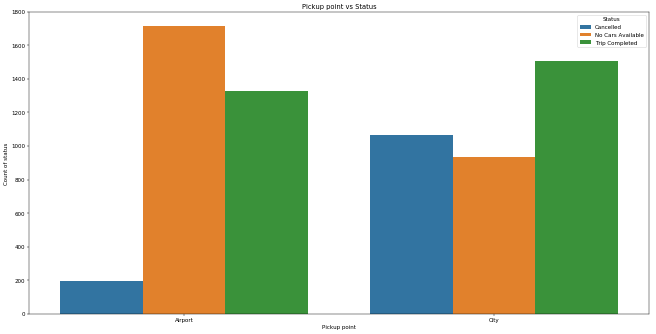

In [19]:
#Draw a plot having relation between pickup point and status
plt.figure(figsize=(20,10),dpi=40)
sns.barplot(x="Pickup point",y="count",hue="Status",data=pickup_status,estimator=np.sum)
plt.title("Pickup point vs Status")
plt.ylabel("Count of status")
plt.show()

From plot (Pickup point vs Status), we can see that most of cab cancelled when pick up point is city and destination is airport
We can also see that most Cabs not available when pickup point is Airport

In [20]:
#Derive data to plot graph having relation between pickup point , request timeframe and status


Cab_issue_status=uber[['Request Day',"Pickup point","Status","Request timeframe",]].loc[uber['Status']!="Trip Completed"].groupby(['Request Day',"Pickup point","Status","Request timeframe"])['Status'].count().reset_index(name='count').sort_values(by="count",ascending=False)
Cab_issue_status.head()


Request Day Pickup point             Status Request timeframe  count
78     Thursday      Airport  No Cars Available     Early Evening    130
81     Thursday      Airport  No Cars Available      Late Evening    122
43       Monday      Airport  No Cars Available     Early Evening    120
114     Tuesday      Airport  No Cars Available     Early Evening    118
117     Tuesday      Airport  No Cars Available      Late Evening    109

In [21]:

Cab_issue_status_new=Cab_issue_status
Cab_issue_status_new["weekday_time"]=Cab_issue_status[['Request Day','Request timeframe']].apply(lambda x:"_".join(x),axis=1)
Cab_issue_status_new["pickup_status"]=Cab_issue_status[['Pickup point','Status']].apply(lambda x:"_".join(x),axis=1)

Cab_issue_status_new.head()



Request Day Pickup point             Status Request timeframe  count  \
78     Thursday      Airport  No Cars Available     Early Evening    130   
81     Thursday      Airport  No Cars Available      Late Evening    122   
43       Monday      Airport  No Cars Available     Early Evening    120   
114     Tuesday      Airport  No Cars Available     Early Evening    118   
117     Tuesday      Airport  No Cars Available      Late Evening    109   

               weekday_time              pickup_status  
78   Thursday_Early Evening  Airport_No Cars Available  
81    Thursday_Late Evening  Airport_No Cars Available  
43     Monday_Early Evening  Airport_No Cars Available  
114   Tuesday_Early Evening  Airport_No Cars Available  
117    Tuesday_Late Evening  Airport_No Cars Available

C:\Users\prabal.paul\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


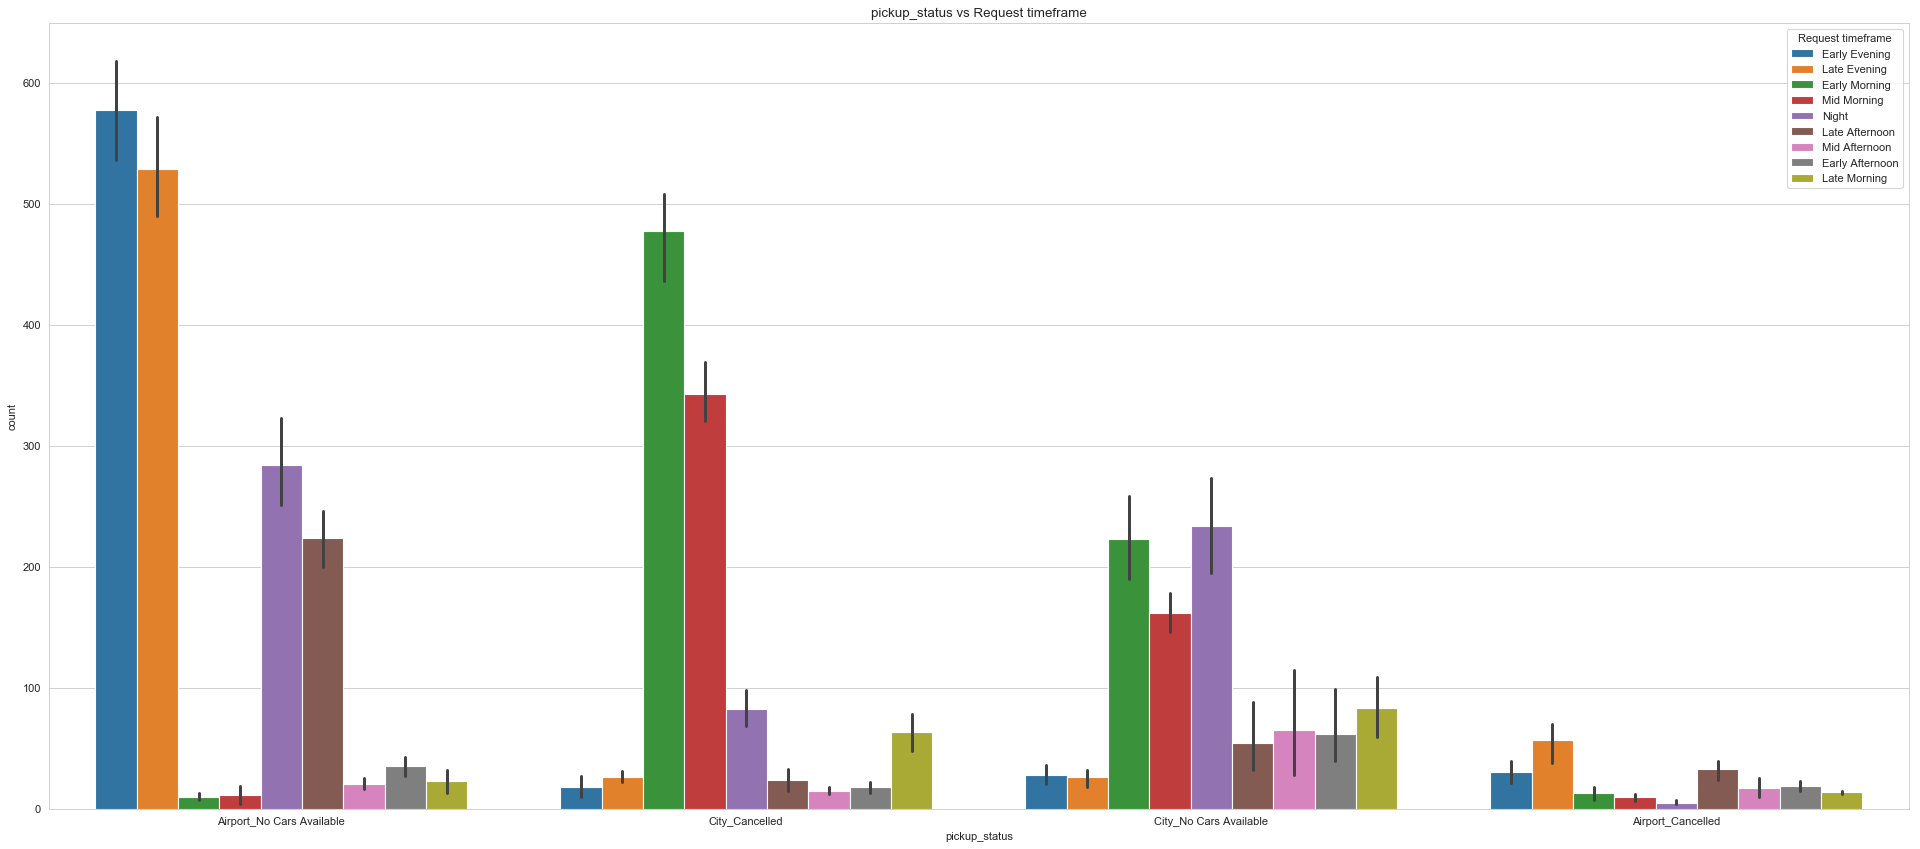

In [50]:
#Draw graph of pickup_status vs Request timeframe
plt.figure(figsize=(30,13),dpi=80)
sns.barplot(x="pickup_status",hue="Request timeframe",y="count",data=Cab_issue_status_new,estimator=np.sum)
plt.title("pickup_status vs Request timeframe")
plt.show()

From pickup_status vs Request timeframe graph we can see that mostly cars are not available when pick up point is Airport in Early Evening , Late Evening, Night and Late afternoon

Also most cab cancelled when pickup point is city in Early Morning and Mid morning

In city CAB is not available mostly in Early Morning, Mid morning and Night

C:\Users\prabal.paul\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


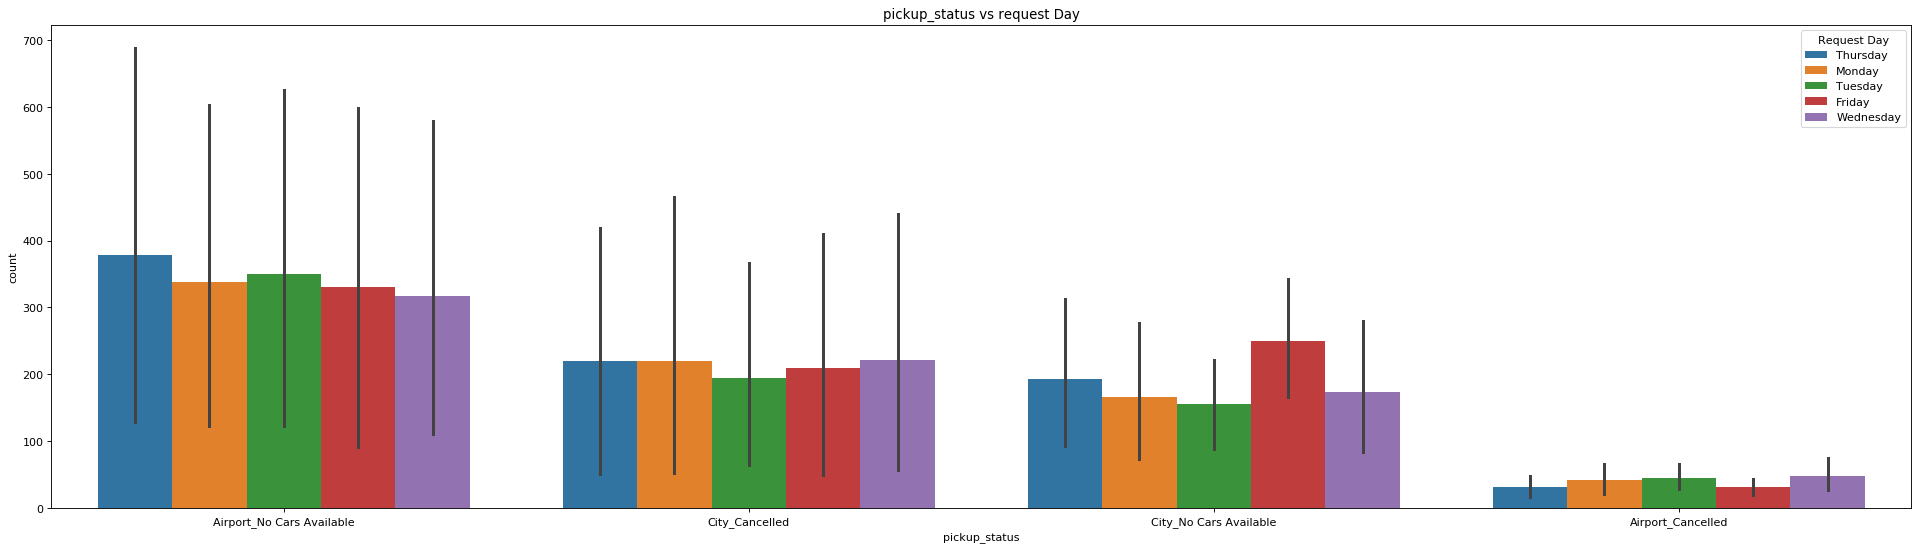

In [23]:
#Draw graph of pickup_status vs weekday_time
plt.figure(figsize=(30,8),dpi=80)

sns.barplot(x="pickup_status",hue="Request Day",y="count",data=Cab_issue_status_new,estimator=np.sum)

plt.title("pickup_status vs request Day")
plt.show()

From this plot we can't find any interesting pattern. So, we can ignore this graph

In [24]:
#derive frequency of calculation rate against different parameter
#create new dataframe by filtering only cancelled status

uber_cancel=uber.loc[uber['Status']=="Cancelled"]

In [25]:
#Drop unnecessary columns like Month, Drop time,
uber_cancel=uber_cancel.drop(['Request month','Drop timestamp'],axis=1)

C:\Users\prabal.paul\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


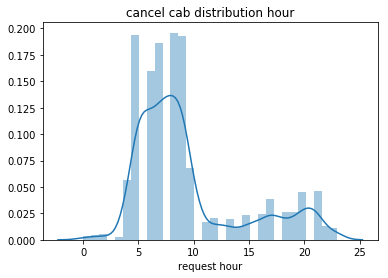

In [26]:
bins=np.linspace(0,24,24)
sns.distplot(uber_cancel['request hour'])
plt.title("cancel cab distribution hour")
plt.show()

C:\Users\prabal.paul\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


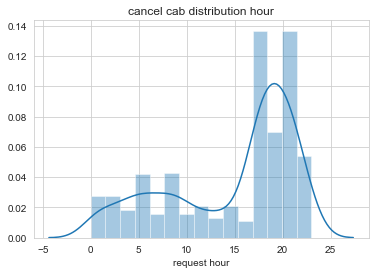

In [51]:
#Distribution for cab not available status
uber_cabna=uber.loc[uber['Status']=="No Cars Available"]


#Drop unnecessary columns like Month, Drop time,
uber_cabna=uber_cabna.drop(['Request month','Drop timestamp'],axis=1)

bins=np.linspace(0,24,24)
sns.distplot(uber_cabna['request hour'])
plt.title("cancel cab distribution hour")
plt.show()

In [28]:

uber_completed=uber[~pd.isnull(uber['Drop timestamp'])]
uber_completed.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  Request Date Request Day Request month  request hour  \
0 2016-07-11 13:00:00            11      Monday          July            11   
1 2016-07-11 18:47:00            11      Monday          July            17   
2 2016-07-12 09:58:00            12     Tuesday          July             9   
3 2016-07-12 22:03:00            12     Tuesday          July            21   
4 2016-07-13 09:25:47            13   Wednesday          July             8   

  Request timeframe  
0      Late Morning  
1    Late Afternoon  
2       Mid Morning  
3      Late Evening  
4       Mid Morning

In [29]:
#Calculate average time for travel from airport to city or vice versa
uber_completed["trip_time"]=uber_completed['Drop timestamp']-uber_completed['Request timestamp']
uber_completed.head()

C:\Users\prabal.paul\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  Request Date Request Day Request month  request hour  \
0 2016-07-11 13:00:00            11      Monday          July            11   
1 2016-07-11 18:47:00            11      Monday          July            17   
2 2016-07-12 09:58:00            12     Tuesday          July             9   
3 2016-07-12 22:03:00            12     Tuesday          July            21   
4 2016-07-13 09:25:47            13   Wednesday          July             8   

  Request timeframe trip_time  
0      Late Morning  01:09:00  
1    Late Afternoon  00:50:00  
2       Mid Morning  00:41:00  
3      Late Evening  00:55:00  
4       Mid Morning  00:52:31

In [30]:
(uber_completed['trip_time'][0].total_seconds())/60

uber_completed["trip_time_minutes"]=uber_completed['trip_time'].apply(lambda x:round(x.total_seconds()/60))
uber_completed.head()


C:\Users\prabal.paul\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  Request Date Request Day Request month  request hour  \
0 2016-07-11 13:00:00            11      Monday          July            11   
1 2016-07-11 18:47:00            11      Monday          July            17   
2 2016-07-12 09:58:00            12     Tuesday          July             9   
3 2016-07-12 22:03:00            12     Tuesday          July            21   
4 2016-07-13 09:25:47            13   Wednesday          July             8   

  Request timeframe trip_time  trip_time_minutes  
0      Late Morning  01:09:00                 69  
1    Late Afternoon  00:50:00                 50  
2       Mid Morning  00:41:00                 41  
3      Late Evening  00:55:00                 55  
4       Mid Morning  00:52:31                 53

In [31]:
#Delete unnecessary rows from derived dataframe
uber_completed=uber_completed.drop(['trip_time','Request month'],axis=1)
uber_completed.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  Request Date Request Day  request hour  \
0 2016-07-11 13:00:00            11      Monday            11   
1 2016-07-11 18:47:00            11      Monday            17   
2 2016-07-12 09:58:00            12     Tuesday             9   
3 2016-07-12 22:03:00            12     Tuesday            21   
4 2016-07-13 09:25:47            13   Wednesday             8   

  Request timeframe  trip_time_minutes  
0      Late Morning                 69  
1    Late Afternoon                 50  
2       Mid Morning                 41  
3      Late Evening                 55  
4       Mid Morning                 53

In [32]:
uber_completed.sort_values(by='trip_time_minutes',ascending=False).head(10)


Request id Pickup point  Driver id          Status   Request timestamp  \
535         4049         City       55.0  Trip Completed 2016-07-14 01:03:12   
746         2417         City       77.0  Trip Completed 2016-07-12 19:59:00   
2104        5976      Airport      221.0  Trip Completed 2016-07-15 11:10:14   
2286        2169      Airport      239.0  Trip Completed 2016-07-12 17:30:00   
2586        2553      Airport      273.0  Trip Completed 2016-07-12 21:23:00   
2592        6042      Airport      273.0  Trip Completed 2016-07-15 13:09:43   
968          510         City      100.0  Trip Completed 2016-07-11 09:40:00   
1214        3656         City      126.0  Trip Completed 2016-07-13 19:11:20   
1093        5086      Airport      113.0  Trip Completed 2016-07-14 19:41:45   
1761        3291         City      185.0  Trip Completed 2016-07-13 11:10:05   

          Drop timestamp  Request Date Request Day  request hour  \
535  2016-07-14 02:26:06            14    Thursday             1   
746  2016-07-12 21:22:00            12     Tuesday            19   
2104 2016-07-15 12:32:18            15      Friday            11   
2286 2016-07-12 18:51:00            12     Tuesday            17   
2586 2016-07-12 22:44:00            12     Tuesday            21   
2592 2016-07-15 14:30:50            15      Friday            13   
968  2016-07-11 11:01:00            11      Monday             9   
1214 2016-07-13 20:32:31            13   Wednesday            19   
1093 2016-07-14 21:02:52            14    Thursday            19   
1761 2016-07-13 12:31:07            13   Wednesday            11   

     Request timeframe  trip_time_minutes  
535              Night                 83  
746      Early Evening                 83  
2104      Late Morning                 82  
2286    Late Afternoon                 81  
2586      Late Evening                 81  
2592   Early Afternoon                 81  
968        Mid Morning                 81  
1214     Early Evening                 81  
1093     Early Evening                 81  
1761      Late Morning                 81

In [33]:
#Calculate average waiting time group by pickup point
uber_completed.groupby('Pickup point',as_index=None)['trip_time_minutes'].mean()

#So we can see that average trip time from airport to city and vice versa is 52 minutes approx

Pickup point  trip_time_minutes
0      Airport          52.238885
1         City          52.567154

In [34]:
#Calculate average waiting time group by pickup point and timeframe
uber_complete_statistics=round(uber_completed.groupby(['Pickup point','Request timeframe'])['trip_time_minutes'].agg(['min','max','mean','count'])).reset_index()
uber_complete_statistics
#From this data we can see a lot of difference between min and max time of a trip
# may be high time is for pool ride

Pickup point Request timeframe  min  max  mean  count
0       Airport   Early Afternoon   27   81  52.0     98
1       Airport     Early Evening   22   81  52.0    164
2       Airport     Early Morning   25   78  52.0    241
3       Airport    Late Afternoon   26   81  53.0    112
4       Airport      Late Evening   24   81  52.0    135
5       Airport      Late Morning   23   82  53.0    102
6       Airport     Mid Afternoon   23   78  51.0     89
7       Airport       Mid Morning   21   79  52.0    141
8       Airport             Night   25   80  53.0    245
9          City   Early Afternoon   21   77  52.0    112
10         City     Early Evening   24   83  50.0    166
11         City     Early Morning   21   80  54.0    285
12         City    Late Afternoon   23   79  51.0    130
13         City      Late Evening   25   80  53.0    168
14         City      Late Morning   21   81  53.0    129
15         City     Mid Afternoon   21   80  54.0    101
16         City       Mid Morning   25   81  53.0    187
17         City             Night   25   83  53.0    226

In [35]:
#now find cab cancelled by mostly which CAB drivers (top  5)
uber_cancel.groupby(['Driver id','Status'])['Status'].count().reset_index(name="count").sort_values(by="count",ascending=False).head(5)


Driver id     Status  count
78        84.0  Cancelled     12
50        54.0  Cancelled     11
200      206.0  Cancelled     10
136      142.0  Cancelled     10
261      267.0  Cancelled      9

In [36]:
#Plot a graph showing timeframe/hour,pickup point wise total no of request, completion count and NA/cancellation count
total_status=uber[['Request timeframe','Pickup point','Status']].groupby(['Pickup point','Request timeframe','Status',])['Status'].count().reset_index(name="count")

total_count=total_status.groupby(['Request timeframe','Pickup point'],as_index=None).sum()
completed_count=total_status.loc[total_status['Status']=='Trip Completed'].groupby(['Request timeframe','Pickup point'],as_index=None).sum()
cancelled_count=total_status.loc[total_status['Status']=='Cancelled'].groupby(['Request timeframe','Pickup point'],as_index=None).sum()
cab_na_count=total_status.loc[total_status['Status']=='No Cars Available'].groupby(['Request timeframe','Pickup point'],as_index=None).sum()

total_count=total_count.rename(columns={'count':"Total_count"})
completed_count=completed_count.rename(columns={'count':"Completed_count"})
cancelled_count=cancelled_count.rename(columns={'count':"Cancelled_count"})
cab_na_count=cab_na_count.rename(columns={'count':"CAB_NA_count"})



In [37]:
#Merge new created tables based on Request timeframe
t1=total_count.merge(completed_count,on=["Request timeframe",'Pickup point'],how="inner")
t2=t1.merge(cancelled_count,on=["Request timeframe",'Pickup point'],how="inner")
Final=t2.merge(cab_na_count,on=["Request timeframe",'Pickup point'],how="inner")
Final

Request timeframe Pickup point  Total_count  Completed_count  \
0    Early Afternoon      Airport          152               98   
1    Early Afternoon         City          192              112   
2      Early Evening      Airport          771              164   
3      Early Evening         City          212              166   
4      Early Morning      Airport          264              241   
5      Early Morning         City          985              285   
6     Late Afternoon      Airport          369              112   
7     Late Afternoon         City          208              130   
8       Late Evening      Airport          721              135   
9       Late Evening         City          220              168   
10      Late Morning      Airport          139              102   
11      Late Morning         City          275              129   
12     Mid Afternoon      Airport          126               89   
13     Mid Afternoon         City          181              101   
14       Mid Morning      Airport          162              141   
15       Mid Morning         City          692              187   
16             Night      Airport          534              245   
17             Night         City          542              226   

    Cancelled_count  CAB_NA_count  
0                19            35  
1                18            62  
2                30           577  
3                18            28  
4                13            10  
5               477           223  
6                33           224  
7                24            54  
8                57           529  
9                26            26  
10               14            23  
11               63            83  
12               17            20  
13               15            65  
14               10            11  
15              343           162  
16                5           284  
17               82           234

In [38]:
Final_city=Final.loc[Final['Pickup point']=="City"]
Final_airport=Final.loc[Final['Pickup point']=="Airport"]

Text(0,0.5,'Count')

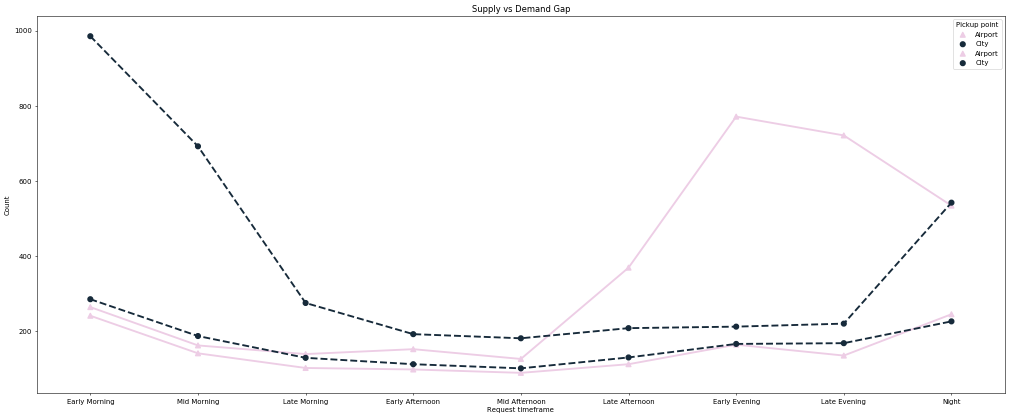

In [39]:
plt.figure(figsize=(25,10),dpi=50)
sns.pointplot(x="Request timeframe",hue="Pickup point",y="Total_count",data=Final,markers=["^", "o"], linestyles=["-", "--"],palette="ch:2.5",order=["Early Morning","Mid Morning","Late Morning","Early Afternoon","Mid Afternoon","Late Afternoon","Early Evening","Late Evening","Night"])
sns.pointplot(x="Request timeframe",hue="Pickup point",y="Completed_count",data=Final,markers=["^", "o"], linestyles=["-", "--"],palette="ch:2.5",order=["Early Morning","Mid Morning","Late Morning","Early Afternoon","Mid Afternoon","Late Afternoon","Early Evening","Late Evening","Night"])
plt.title("Supply vs Demand Gap")
plt.ylabel("Count")


#In below graph black higher point is total no of trips when pickup is City, pink higher points is trip from Airport

#From below picture we can easily see that from Night to Late morning in city CAB demand is very high but trip completion rate is extremly bad in this time frame
#So, in city from Night to Late morning  cab count need to increase

#In airport, there is huge shortage of cab from late afternoon to night
#so in airport cab count need to increase from late afternoon to night

<Figure size 432x288 with 0 Axes>

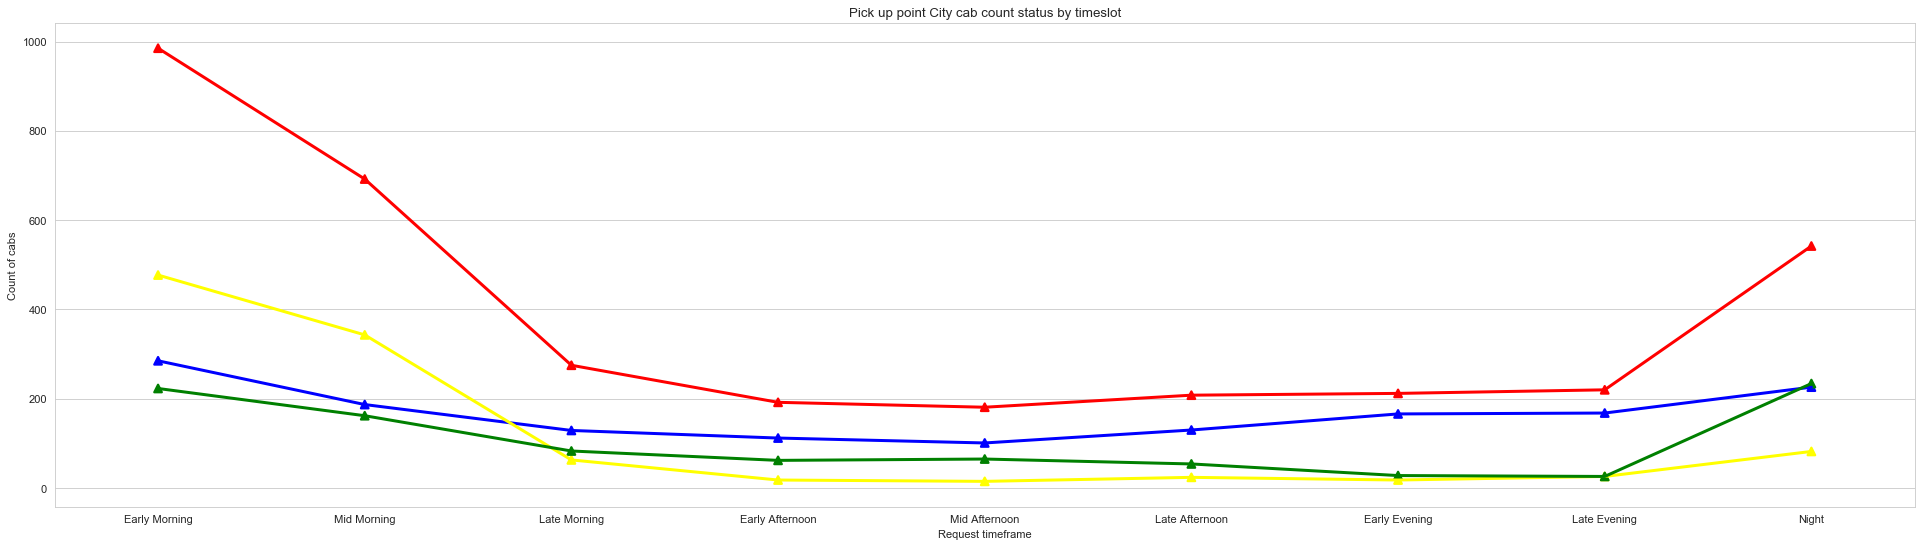

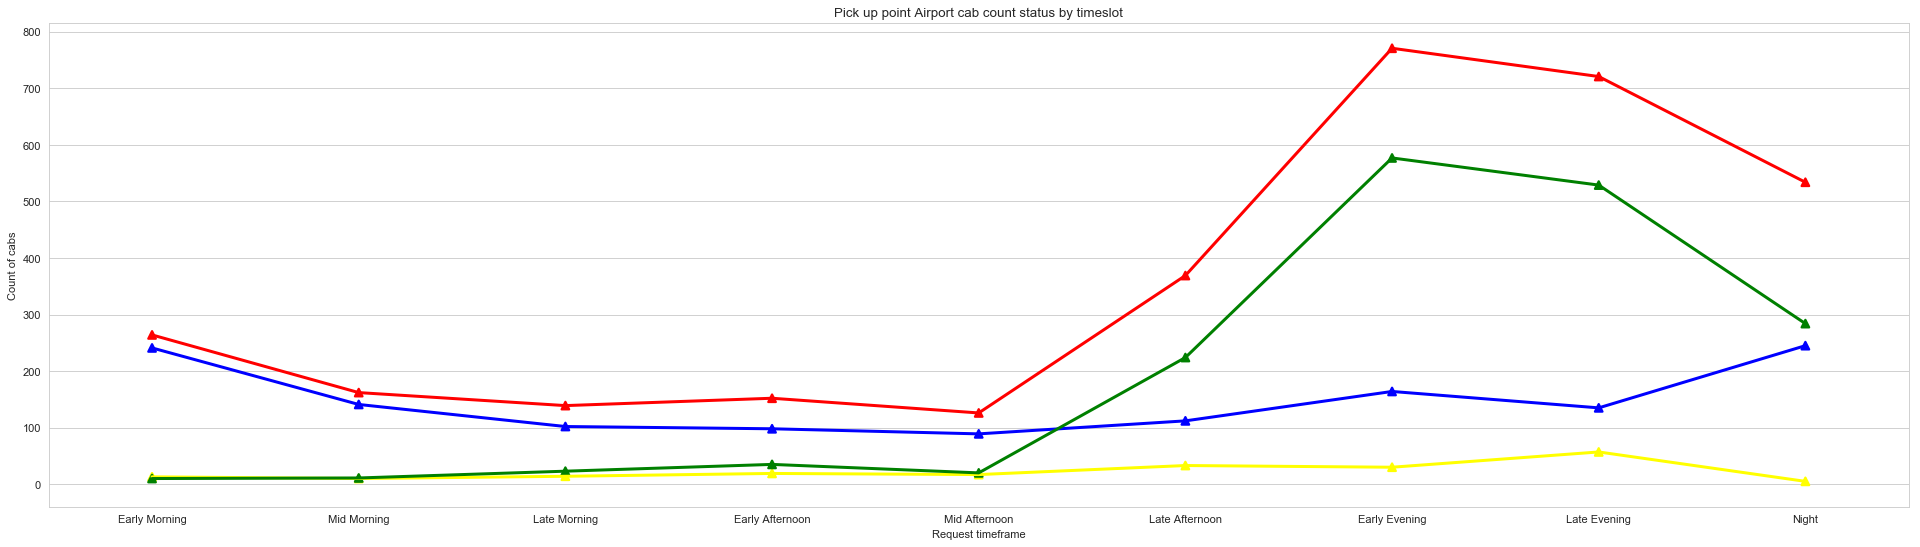

In [46]:

#draw plot for city and airport related cab counts graph
#Red- total demand
#Blue- completed count
#Yellow - Cancelled count
#Green - Can not available count

plt.figure(1)
plt.figure(figsize=(30,8),dpi=80)
sns.set_style("whitegrid")
sns.pointplot(x="Request timeframe",y="Total_count",data=Final_city,markers=["^", "o"], linestyles=["-", "--"],color="Red",order=["Early Morning","Mid Morning","Late Morning","Early Afternoon","Mid Afternoon","Late Afternoon","Early Evening","Late Evening","Night"])
sns.pointplot(x="Request timeframe",y="Completed_count",data=Final_city,markers=["^", "o"], linestyles=["-", "--"],color="Blue",order=["Early Morning","Mid Morning","Late Morning","Early Afternoon","Mid Afternoon","Late Afternoon","Early Evening","Late Evening","Night"])
sns.pointplot(x="Request timeframe",y="Cancelled_count",data=Final_city,markers=["^", "o"], linestyles=["-", "--"],color="Yellow",order=["Early Morning","Mid Morning","Late Morning","Early Afternoon","Mid Afternoon","Late Afternoon","Early Evening","Late Evening","Night"])
sns.pointplot(x="Request timeframe",y="CAB_NA_count",data=Final_city,markers=["^", "o"], linestyles=["-", "--"],color="Green",order=["Early Morning","Mid Morning","Late Morning","Early Afternoon","Mid Afternoon","Late Afternoon","Early Evening","Late Evening","Night"])
plt.title("Pick up point City cab count status by timeslot")
plt.ylabel("Count of cabs")

plt.figure(2)
plt.figure(figsize=(30,8),dpi=80)
sns.pointplot(x="Request timeframe",y="Total_count",data=Final_airport,markers=["^", "o"], linestyles=["-", "--"],color="Red",order=["Early Morning","Mid Morning","Late Morning","Early Afternoon","Mid Afternoon","Late Afternoon","Early Evening","Late Evening","Night"])
sns.pointplot(x="Request timeframe",y="Completed_count",data=Final_airport,markers=["^", "o"], linestyles=["-", "--"],color="Blue",order=["Early Morning","Mid Morning","Late Morning","Early Afternoon","Mid Afternoon","Late Afternoon","Early Evening","Late Evening","Night"])
sns.pointplot(x="Request timeframe",y="Cancelled_count",data=Final_airport,markers=["^", "o"], linestyles=["-", "--"],color="Yellow",order=["Early Morning","Mid Morning","Late Morning","Early Afternoon","Mid Afternoon","Late Afternoon","Early Evening","Late Evening","Night"])
sns.pointplot(x="Request timeframe",y="CAB_NA_count",data=Final_airport,markers=["^", "o"], linestyles=["-", "--"],color="Green",order=["Early Morning","Mid Morning","Late Morning","Early Afternoon","Mid Afternoon","Late Afternoon","Early Evening","Late Evening","Night"])
plt.title("Pick up point Airport cab count status by timeslot")
plt.ylabel("Count of cabs")
plt.show()


##Red- total demand
##Blue- completed count
##Yellow - Cancelled count
##Green - Can not available count


Pick up point------ city 
=========

From late evening to Late morning there is significant gap between supply and demand 
--------
In night time mostly cabs are not available in city
From Early morning to late morning cabs getting cancelled mostly 
So, in city from Night to Late morning  cab count need to increase
-------



pick up point ----Airport
======
From mid afternoon to night there is significant gap between supply and demand 
In this time, cabs are not available in airport mostly
Cab cancellation rate in airport is very less but cab is not available


From the 2 graph also we can see that supply of cab is negatively co-related in city and airport

From late morning to mid afternoon, demand is less in both pickup point

In airport from Mid afternoon to Late evening - high demand , Less ratio trip completed
In city from Mid afternoon to Late evening - less demand , high ratio trip completed

In airport from early morning to late morning - less demand , high ratio trip completed
In city from early morning to late morning - high demand , low ratio trip completed



Basically from Night to Late morning in city cab count need to be increased
-------------

In airport , from mid afternoon to night cab count need to be increased
------------